In [1]:
pwd

'/data2/mito_lineage/Analysis/multiplex/data/chrM/pseudo/minC20_minAF0.01/numC2000_ispropFalse'

In [2]:
# AD_F = ""#"cellSNP.tag.AD.mtx"
# DP_F = ""#"cellSNP.tag.DP.mtx"
# VCF_F = ""#"cellSNP.base.vcf"
NUM_DONORS=2
prob_threshold=0.8
INDIR = ""

In [4]:
import os
import pandas as pd
import seaborn as sns
from glob import glob
from scipy import stats
from os.path import join, dirname, basename
import numpy as np

In [5]:
if not os.path.exists(INDIR):
    print(f"{INDIR} does not exist.")

os.chdir(INDIR)

data/chrM/pseudo/minC20_minAF0.01/numC2000_ispropFalse does not exist.


In [6]:
AD_F = "cellSNP.tag.AD.mtx"
DP_F = "cellSNP.tag.DP.mtx"
VCF_F = "cellSNP.base.vcf"

In [8]:
if not os.path.exists(VCF_F):
    if not os.path.exists(VCF_F+".gz"):
        print("VCF file not here!")
    else:
        VCF_F = VCF_F + ".gz"

In [9]:
print(AD_F)
print(DP_F)
print(VCF_F)

cellSNP.tag.AD.mtx
cellSNP.tag.DP.mtx
cellSNP.base.vcf


In [10]:
OUTDIR='./results/'

In [11]:
#indirs = ("data/PBMC_J_cellSNP", "data/PBMC_P_cellSNP")

In [12]:
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)

In [13]:

in_cell_f = glob("cell_indices_*.txt")
print('cell inds', in_cell_f)
in_cell_names = []
cell_map = {}
for curr_cell_f in in_cell_f:
    print(curr_cell_f)
    with open(curr_cell_f, "r") as f:
        count = 0
        lines = []
        for line in f: 
            if count == 0:
                curr_f = line.strip()
            else:
                lines.append(line.strip().split(','))
            count += 1
    curr_df = pd.DataFrame(lines[1:], columns=lines[0])
    cell_map[curr_f] = curr_df["new index"].astype(int).values
    in_cell_names.append(curr_f)

cell inds ['cell_indices_0.txt', 'cell_indices_1.txt']
cell_indices_0.txt
cell_indices_1.txt


In [14]:
cell_map[curr_f]

array([ 744,  745,  746,  747,  748,  749,  750,  751,  752,  753,  754,
        755,  756,  757,  758,  759,  760,  761,  762,  763,  764,  765,
        766,  767,  768,  769,  770,  771,  772,  773,  774,  775,  776,
        777,  778,  779,  780,  781,  782,  783,  784,  785,  786,  787,
        788,  789,  790,  791,  792,  793,  794,  795,  796,  797,  798,
        799,  800,  801,  802,  803,  804,  805,  806,  807,  808,  809,
        810,  811,  812,  813,  814,  815,  816,  817,  818,  819,  820,
        821,  822,  823,  824,  825,  826,  827,  828,  829,  830,  831,
        832,  833,  834,  835,  836,  837,  838,  839,  840,  841,  842,
        843,  844,  845,  846,  847,  848,  849,  850,  851,  852,  853,
        854,  855,  856,  857,  858,  859,  860,  861,  862,  863,  864,
        865,  866,  867,  868,  869,  870,  871,  872,  873,  874,  875,
        876,  877,  878,  879,  880,  881,  882,  883,  884,  885,  886,
        887,  888,  889,  890,  891,  892,  893,  8

In [15]:
in_cell_names

['data/chrM/PBMC_J_cellSNP_minC20_minAF0.01',
 'data/chrM/PBMC_P_cellSNP_minC20_minAF0.01']

# Examples of using vireoSNP for donor deconvolution

In [16]:
import vireoSNP
from vireoSNP import Vireo

import numpy as np
from scipy import sparse
from scipy.io import mmread

## Load cellSNP data 

##### Option 1 - VCF format

In [17]:
# cell_vcf = vireoSNP.load_VCF(VCF_F, biallelic_only=True)
# cell_dat = vireoSNP.vcf.read_sparse_GeneINFO(cell_vcf['GenoINFO'], keys=['AD', 'DP'])

# AD = cell_dat['AD']
# DP = cell_dat['DP']

##### Option 2 - sparse matrices

In [18]:
AD = mmread(AD_F).tocsc()
AD_shape = AD.todense().shape
DP = mmread(DP_F).tocsc()
vcf = pd.read_csv(VCF_F, sep='\t')

In [19]:
vcf.head()

,#CHROM,POS,ID_x,REF_x,ALT,QUAL_x,FILTER_x,INFO_x,old data/chrM/PBMC_J_cellSNP_minC20_minAF0.01,ID_y,REF_y,QUAL_y,FILTER_y,INFO_y,old data/chrM/PBMC_P_cellSNP_minC20_minAF0.01,new ID
0,chrM,297,.,A,C,.,PASS,AD=1999;DP=131616;OTH=497,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,chrM,300,.,A,C,.,PASS,AD=4336;DP=123361;OTH=353,2.0,.,A,.,PASS,AD=6667;DP=298868;OTH=1024,1.0,2
2,chrM,301,.,A,C,.,PASS,AD=1275;DP=116676;OTH=1179,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3
3,chrM,302,.,A,G,.,PASS,AD=3326;DP=111520;OTH=2183,4.0,.,A,.,PASS,AD=13460;DP=267646;OTH=7457,2.0,4
4,chrM,304,.,C,G,.,PASS,AD=1486;DP=111198;OTH=255,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5


Note, `AD` and `DP` are sparse matrices, not `numpy.array`

## Run Vireo
For donor deconvolution, the `vireoSNP.vireo_wrap` function can be directly used, which contains multiple initialization and have options for different situtaions of donor genotype, fully missing, partially lack, or all available.

In [20]:
np.random.seed(1)

n_initials = 50

_models_all = []
for i in range(n_initials):
    _modelCA = Vireo(n_var=AD_shape[0], n_cell=AD_shape[1], n_donor=2, n_GT=2,
                     fix_beta_sum=False, ASE_mode=True)
    _modelCA.set_prior(beta_mu_prior=np.array([[0.01, 0.5]]))
    _modelCA.fit(AD, DP, min_iter=20, verbose=False, delay_fit_theta=0)
    _models_all.append(_modelCA)
    

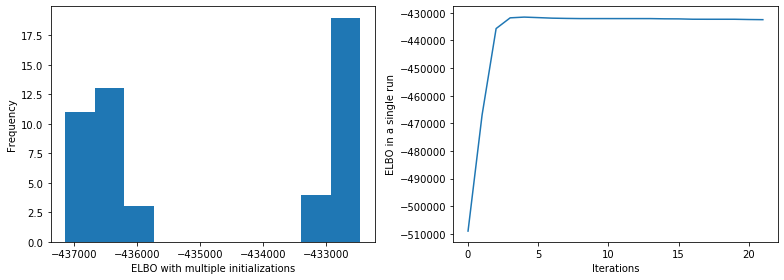

In [21]:
import matplotlib.pyplot as plt
## Choose the model giving highest ELBO

_idx = np.argmax([x.ELBO_[-1] for x in _models_all])
modelCA = _models_all[_idx]
_losses = modelCA.ELBO_

fig = plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.hist([x.ELBO_[-1] for x in _models_all])
plt.ylabel("Frequency")
plt.xlabel("ELBO with multiple initializations")

plt.subplot(1, 2, 2)
plt.plot(_losses)
plt.xlabel("Iterations")
plt.ylabel("ELBO in a single run")

plt.tight_layout()
plt.show()

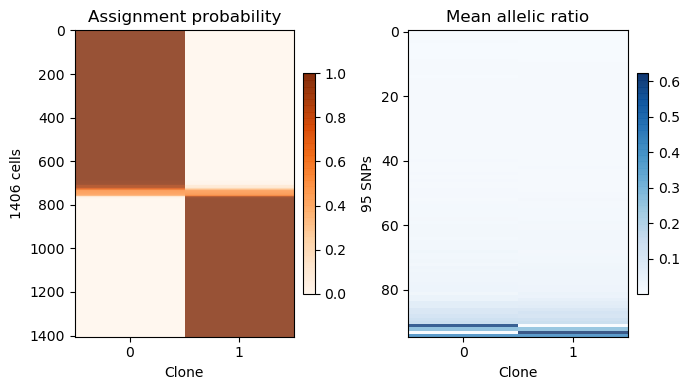

In [22]:
import matplotlib.pyplot as plt
from vireoSNP.plot.base_plot import heat_matrix

fig = plt.figure(figsize=(7, 4), dpi=100)
plt.subplot(1, 2, 1)
im = heat_matrix(modelCA.ID_prob, cmap="Oranges", alpha=0.8,
                 display_value=False, row_sort=True)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Assignment probability")
plt.xlabel("Clone")
plt.ylabel("%d cells" %(modelCA.n_cell))
plt.xticks(range(modelCA.n_donor))


plt.subplot(1, 2, 2)
AF_SNPs = np.sum(modelCA.GT_prob * 
                 np.expand_dims(modelCA.beta_mu, 1), axis=2)
im = heat_matrix(AF_SNPs, cmap="Blues", alpha=0.8, 
                 display_value=False, row_sort=True)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Mean allelic ratio")
plt.xlabel("Clone")
plt.ylabel("%d SNPs" %(modelCA.n_var))
plt.xticks(range(modelCA.n_donor))

plt.tight_layout()
plt.show()

In [23]:
max_v = 0
for i in in_cell_names:
    max_v = max(max_v, max(cell_map[i]))
    
# create index map:
cell_ind_map = {}
count = 0
for i in in_cell_names: 
    cell_ind_map[i] = count
    count += 1

cell_inds = -1*np.ones(max_v)
for i in in_cell_names:
    cell_inds[cell_map[i]-1] = cell_ind_map[i] #cell_map[i]
cell_inds

array([0., 0., 0., ..., 1., 1., 1.])

In [24]:
donor_ids_best = np.argmax(modelCA.ID_prob, axis=1)
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(cell_inds, donor_ids_best).ravel()
(tn, fp, fn, tp)

(710, 33, 34, 629)

Text(205.02197802197801, 0.5, 'Cell')

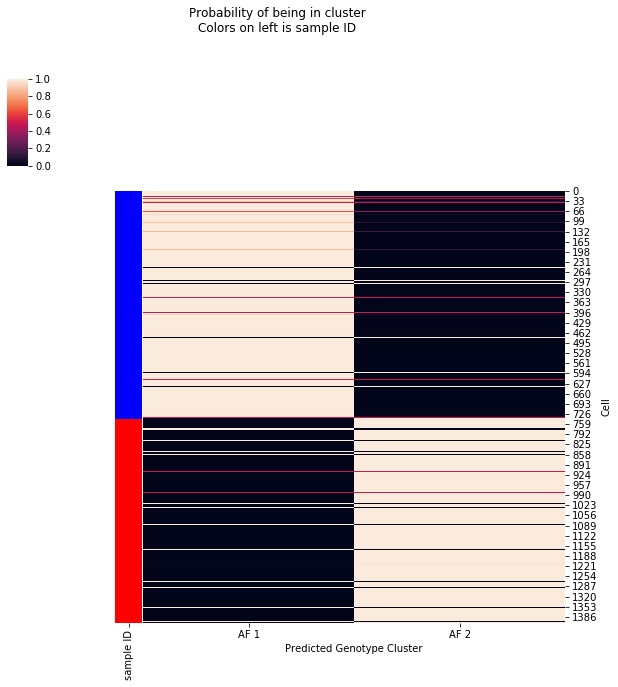

In [25]:
colors = {0:"blue", 1:"red"}
cell_colors = [colors[x] for x in cell_inds]
cell_colors = pd.Series(cell_colors, name="sample ID")
g = sns.clustermap(data=pd.DataFrame(modelCA.ID_prob, columns=[f"AF {x+1}" for x in np.arange(modelCA.ID_prob.shape[1])]), row_cluster=False, col_cluster=False,
              row_colors=cell_colors)
#plt.ylabel("Cell")
#plt.xlabel("Predicted Genotype Cluster")
g.fig.suptitle("Probability of being in cluster\nColors on left is sample ID")
g.ax_heatmap.set_xlabel("Predicted Genotype Cluster")
g.ax_heatmap.set_ylabel("Cell")

#plt.savefig("pseudo_multiplex_with_cellIDs.png")

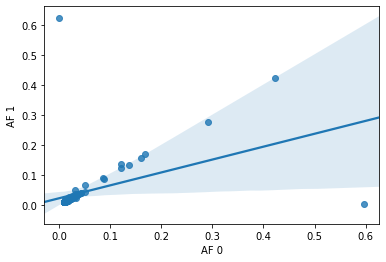

In [26]:
for ind, val in enumerate(in_cell_names):
    vcf["AF " + str(ind)] = AF_SNPs[:, ind]
#vcf.iloc[ind.argsort()[::-1]].head(100)
vcf.iloc[vcf["AF " + str(ind)].argsort()[::-1].values]

sns.regplot(data=vcf, x ="AF 0" , y="AF 1")

## Choose the number of donors

Unsually, the number of donors are known. In case you are not sure on this, you could try a set of numbers, e.g., from 2 to 6 here, and pick the one when the evidence lower bound (ELBO) stops increasing, e.g., 
[Figure 2A in Vireo paper](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1865-2/figures/2)

In this data set, `n_donor=4` is a sensible choice.

[vireo] lower bound ranges [-686892.6, -686892.6, -672720.4]
[vireo] allelic rate mean and concentrations:
[[0.019 0.137 0.99 ]]
[[4.93374674e+07 4.20221360e+06 5.00000000e+01]]
[vireo] donor size before removing doublets:
donor0	donor1
842	564
[vireo] lower bound ranges [-686788.2, -686788.2, -672642.1]
[vireo] allelic rate mean and concentrations:
[[0.019 0.137 0.99 ]]
[[4.93436181e+07 4.19606290e+06 5.00000000e+01]]
[vireo] donor size before removing doublets:
donor0	donor1	donor2
438	530	438
[vireo] lower bound ranges [-686683.9, -686683.9, -684345.3]
[vireo] allelic rate mean and concentrations:
[[0.019 0.143 0.99 ]]
[[4.96977951e+07 3.84188590e+06 5.00000000e+01]]
[vireo] donor size before removing doublets:
donor0	donor1	donor2	donor3
341	382	341	341
[vireo] lower bound ranges [-686579.5, -686579.5, -684239.6]
[vireo] allelic rate mean and concentrations:
[[0.019 0.143 0.99 ]]
[[4.96974344e+07 3.84224660e+06 5.00000000e+01]]
[vireo] donor size before removing doublets:
donor0	do

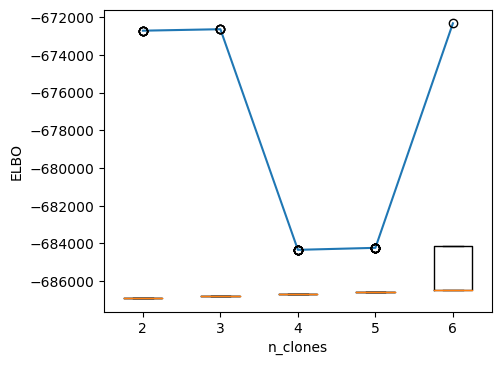

In [27]:
n_donor_list = np.arange(2, 7)
ELBO_list_all = []
for _n_don in n_donor_list:
    res = vireoSNP.vireo_wrap(AD, DP, n_donor=_n_don, learn_GT=True,
                              n_extra_donor=0, ASE_mode=False, fix_beta_sum=False,
                              n_init=50, check_doublet=True, random_seed=1)
    ELBO_list_all.append(res['LB_list'])

import matplotlib.pyplot as plt
from vireoSNP.plot.base_plot import heat_matrix

fig = plt.figure(figsize=(5, 4), dpi=100)
plt.plot(n_donor_list - 1, np.max(ELBO_list_all, axis=1))
plt.boxplot(ELBO_list_all)
plt.xticks(n_donor_list - 1, n_donor_list)
plt.ylabel("ELBO")
plt.xlabel("n_clones")
plt.show()

#plt.savefig(join(OUTDIR, "number_of_donors_ELBO.png"))